In [2]:
# Tom Deng 662007936

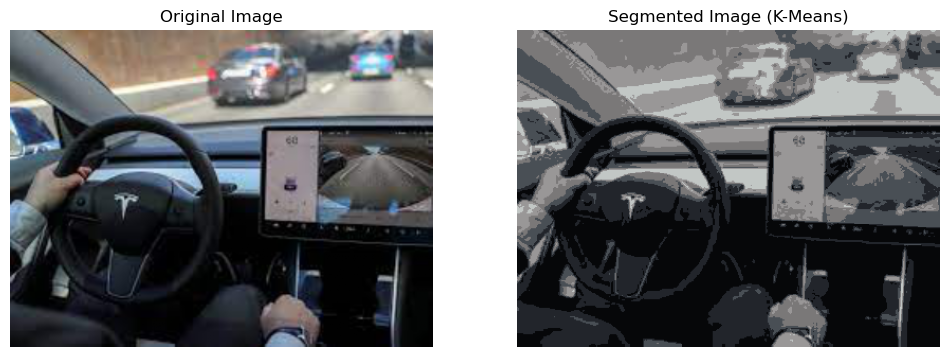

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans

# Step 1: Load the image
image_path = "C:\\Users\\Tom\\Downloads\\seg2.jpg"  # Change this to the actual image path
image = imread(image_path)

# Step 2: Resize image for faster processing (optional)
image = resize(image, (300, 400), anti_aliasing=True)  # Resize to 300x400 pixels

# Step 3: Reshape image to 2D array (each pixel is a data point)
h, w, c = image.shape  # Get height, width, and channels
pixels = image.reshape(-1, c)  # Reshape to (num_pixels, num_channels)

# Step 4: Apply K-Means clustering
num_clusters = 6  # Number of segments (adjust as needed)
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)

# Step 5: Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels]
segmented_image = segmented_image.reshape(h, w, c)  # Reshape back to original dimensions

# Step 6: Display the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title("Segmented Image (K-Means)")
ax[1].axis("off")

plt.show()



In [7]:
#Problem 2
import pandas as pd
# Load the dataset (Modify 'housing_prices.csv' to the actual file name)
data = pd.read_txt("C:\\Users\\Tom\\Downloads\\housing_prices.txt")  # Assumes two columns: Population, Price

# Extract features (X) and target variable (y)
X = data.iloc[:, 0].values.reshape(-1, 1)  # Population
y = data.iloc[:, 1].values.reshape(-1, 1)  # Price

# Normalize features (Mean Normalization)
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

# Add intercept term (bias)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X


AttributeError: module 'pandas' has no attribute 'read_txt'

In [8]:
def compute_cost(X, y, theta):
    """
    Compute the cost function J for linear regression.

    Parameters:
    X (ndarray): Feature matrix (with bias term).
    y (ndarray): Target variable.
    theta (ndarray): Model parameters.

    Returns:
    float: Cost J
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


def mini_batch_gradient_descent(X, y, theta, learning_rate, batch_size, num_iters):
    """
    Perform Mini-Batch Gradient Descent.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Target variable.
    theta (ndarray): Model parameters.
    learning_rate (float): Learning rate.
    batch_size (int): Mini-batch size.
    num_iters (int): Number of iterations.

    Returns:
    theta (ndarray): Optimized parameters.
    J_history (list): History of cost function values.
    """
    m = len(y)
    J_history = []

    for i in range(num_iters):
        indices = np.random.permutation(m)  # Shuffle data indices
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (1 / batch_size) * X_batch.T.dot(errors)
            theta -= learning_rate * gradient  # Update theta

        J_history.append(compute_cost(X, y, theta))  # Store cost for plotting

    return theta, J_history

In [9]:
# Initialize parameters
theta = np.zeros((2, 1))  # Two parameters: intercept and slope
learning_rate = 0.01
num_iters = 1000
batch_sizes = [1, 5, 10, 20]

# Store cost history for each batch size
cost_histories = {}

plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    theta_init = np.zeros((2, 1))  # Reset theta for each batch size
    theta_opt, J_history = mini_batch_gradient_descent(X, y, theta_init, learning_rate, batch_size, num_iters)
    cost_histories[batch_size] = J_history
    plt.plot(range(len(J_history)), J_history, label=f'Batch Size {batch_size}')

plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function J over Iterations for Different Batch Sizes")
plt.legend()
plt.show()


NameError: name 'X' is not defined

<Figure size 1000x600 with 0 Axes>

In [10]:
# Normalize the input population value
pop_input = (160000 - X_mean) / X_std
pop_input = np.array([1, pop_input]).reshape(1, -1)  # Add bias term

# Predict using the best-trained model (batch size 10 as an example)
predicted_price = pop_input.dot(theta_opt)
print(f"Predicted house price for a city with population 160,000: ${predicted_price[0,0]:.2f}")


NameError: name 'X_mean' is not defined

In [11]:
#Problem 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [12]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Feature matrix
y = data.target  # Target variable (0 = Malignant, 1 = Benign)

# Display dataset information
print("Dataset Features:\n", X.head())
print("\nTarget Labels:\n", np.unique(y, return_counts=True))  # Distribution of classes


Dataset Features:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perime

In [13]:
# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [14]:
# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Use RFE to select the top 2 features
rfe = RFE(log_reg, n_features_to_select=2)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("\nSelected Best Two Features for Classification:", selected_features)



Selected Best Two Features for Classification: Index(['worst area', 'worst concave points'], dtype='object')


In [16]:
# Select only the best two features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

# Train logistic regression with selected features
log_reg.fit(X_train_selected, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Predict on test set
y_pred = log_reg.predict(X_test_selected)


In [18]:
# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation Metrics:
Accuracy: 0.9415
Precision: 0.9450
Recall: 0.9626
F1 Score: 0.9537

Confusion Matrix:
[[ 58   6]
 [  4 103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



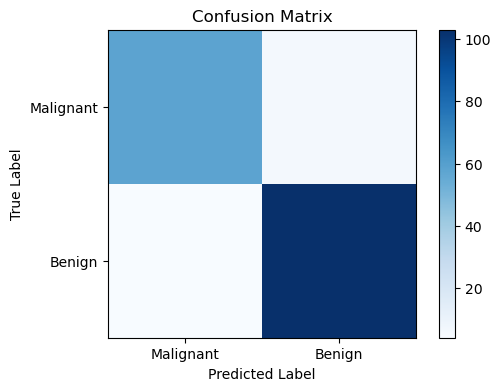

In [19]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.yticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
